
# Preprocessing
---
When working with data for natural language tasks, it is important to process the data. This can include removeing common words, known as stop words (e.g. the), and tokenisation.
## What is Tokenisation?
Tokenisation is splitting up the data into smaller subsets of the data that the computer can understand. This could be splitting a document into sentences, words or letters, depending on the use case. 

Tokenisation can also include other techniques such as removing punctuation and correcting mispelled words.

An example of a basic tokenizer is shown below.

In [27]:
import string
def basic_tokenizer(sentence):
    punctuation = string.punctuation
    try:
        string2 = sentence.lower()
    except:
        print(sentence)
        string2 = sentence
    newstring = ''
    for char in string2:
        if char not in punctuation:
            newstring += char
    stingOfWord = newstring.split(' ')
    return(stingOfWord)

print(basic_tokenizer("This is a test sentence for the basic tokeniser. It should remove all punctuation, and make every word lower case!"))

['this', 'is', 'a', 'test', 'sentence', 'for', 'the', 'basic', 'tokeniser', 'it', 'should', 'remove', 'all', 'punctuation', 'and', 'make', 'every', 'word', 'lower', 'case']


## Removing Stopwords
Stopwords are the common words that might be in a sentence that do not contribute to the meaning of the sentence. For example, "the","and" and "in" are all considered stop words in english. Before a sentence or document can have the stopwords removed, it needs to be tokenised.

Below is an example of how you might remove the stop words from a list of words.

In [3]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

def remove_stopwords(list, stop_words):
    output = []
    for item in list:
        if item not in stop_words:
            output.append(item)
    return output

sentence = basic_tokenizer("This is a test sentece that will get all stop words removed. First we need to tokenise it!")
print(remove_stopwords(sentence, stop_words))

['test', 'sentece', 'get', 'stop', 'words', 'removed', 'first', 'need', 'tokenise']


Shown above are only the basic techniques that can be used for preprocessing. There are other methods that can be used, such as stemming and lemmatization. These processes try to group words that come from the same base, such as swims and swimming.

The difference between stemming and lemmatization is that stemming just removes the suffix, often resulting in incorrect meanings or spelling errors. Lemmatization, on the other hand, considers the context and converts the word to its meaningful base form.

A sentence or document needs to be tokenised and have the stop words removed before it can be lemmatized.

In [4]:
import nltk
from nltk.stem import WordNetLemmatizer
#nltk.download("wordnet")


def simple_lemmatizer(sentence_list):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(item)for item in sentence_list]

sentence = "This is a test sentence for the lemmatizer. First, it needs to be tokenised and have the stop words removed!"
sentence = basic_tokenizer(sentence)
sentence = remove_stopwords(sentence, stop_words)
sentence = simple_lemmatizer(sentence)
print(sentence)



['test', 'sentence', 'lemmatizer', 'first', 'need', 'tokenised', 'stop', 'word', 'removed']


## Preprocessing
When we put all of this together, we get a preprocessing algorithm. This can be run on a sentence or document and will return the fully preprocessed version of the input. 

In [5]:
def preprocess(sentence, stop_words):
    tokenized = basic_tokenizer(sentence)
    clean = remove_stopwords(tokenized, stop_words)
    lemmatized = simple_lemmatizer(clean)

    return lemmatized

print(preprocess("This is a test sentence for the preprocessor. It should be tokenised and have all of the stop words removed!",stop_words))

['test', 'sentence', 'preprocessor', 'tokenised', 'stop', 'word', 'removed']


# Data Analysis
---
When using data, it is a good idea to visualise it in different ways to get a sense for the nature of the data.
There are various ways to do this, for example, we can plot histograms and wordmaps.

First, we need to load the data and have a look at it. We can also add a column for the length of the headline.

In [12]:
import pandas as pd

fp = './NLP/data/train_df.csv'
df = pd.read_csv(fp)

df["headline_length"]=df["headline"].str.len()

df.head()

article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  \
0  former versace store clerk sues over secret 'b...             0   
1  the 'roseanne' revival catches up to our thorn...             0   
2  mom starting to fear son's web series closest ...             1   
3  boehner just wants wife to listen, not come up...             1   
4  j.k. rowling wishes snape happy birthday in th...             0   

   headline_length  
0               78  
1               84  
2               79  
3               84  
4               64

## Histograms
One way we could look at the data would be to compare the lengths of the sarcastic headines vs the not sarcastic ones.

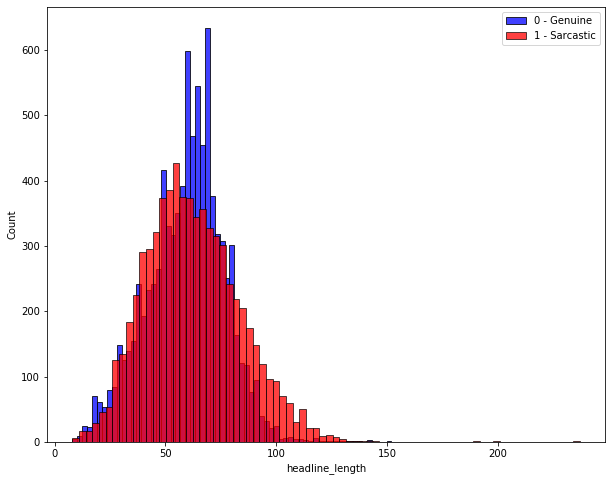

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_headline_char_lengths(df):
    # Get lists of the genuine headline lengths
    genuine = df[df['is_sarcastic'] == 0]
    lengths_genuine = genuine['headline_length']
    
    # Get a list of the sarcastic headline lengths
    sarcastic = df[df['is_sarcastic'] == 1]
    lengths_sarcastic = sarcastic['headline_length']
    
    # Set the plot size
    plt.figure(figsize=(10,8))
    
    # Comment out one of the following two lines to plot distributions one at a time
    sns.histplot(lengths_genuine, label='0 - Genuine', color='blue')
    sns.histplot(lengths_sarcastic, label='1 - Sarcastic', color='red')
    
    plt.legend()

plot_headline_char_lengths(df)

Alternativley, we could look at the word count of the data.

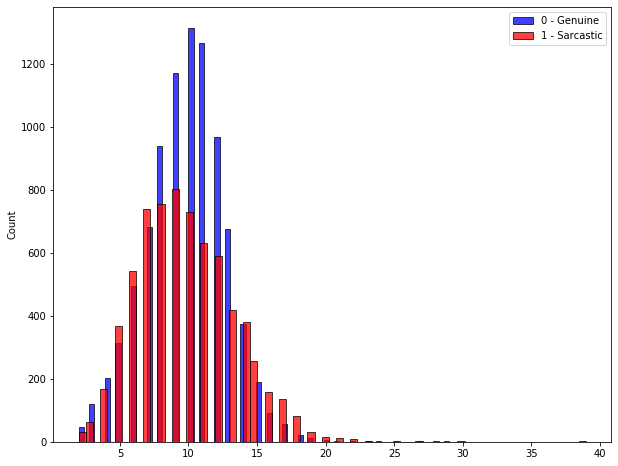

In [15]:
def plot_headline_word_count(df):
    #Gets sarcastic headlines and appends the word count of each headline to a list
    sarcastic = (df[df['is_sarcastic']==1]['headline'])
    sarcasticSeparated = []
    for item in sarcastic:
        sarcasticSeparated.append(len(item.split(' ')))

    #Repoeats this process for genunie headlines
    genuine = (df[df['is_sarcastic']==0]['headline'])
    genuineSeparated = []
    for item in genuine:
        genuineSeparated.append(len(item.split(' ')))

    # Set the plot size
    plt.figure(figsize=(10,8))
    
    # Plots the data
    sns.histplot(genuineSeparated, label='0 - Genuine', color="blue")
    sns.histplot(sarcasticSeparated, label='1 - Sarcastic', color="red")
    
    # Add a legend to the plot
    plt.legend()

plot_headline_word_count(df)

## Word Clouds
To create the wordclouds, we need to turn all of the genuine headlines into one long list, and the same for the sarcastic headlines.

These long strings can then be turned into a word cloud using the python library wordcloud.

Genunine headlines wordcloud:


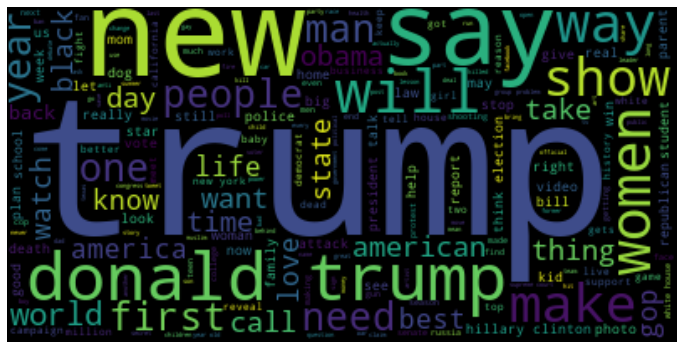

Sarcastic headlines wordcloud:


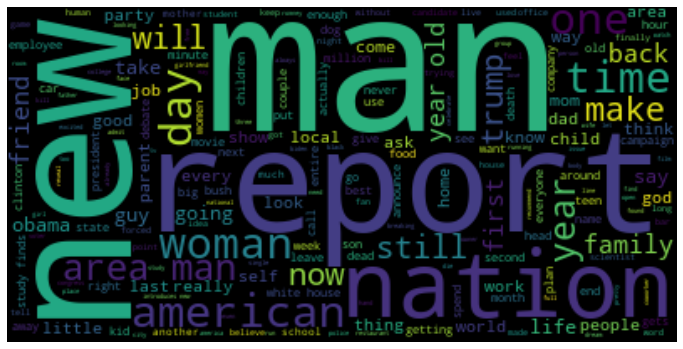

In [18]:
from wordcloud import WordCloud

def create_genuine_wordcloud(df):
    text = (df[df['is_sarcastic']==0]['headline'])
    text = (' '.join(text))
    wc = WordCloud()
    wordcloud = wc.generate(text)

    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def create_sarcastic_wordcloud(df):
    text = (df[df['is_sarcastic']==1]['headline'])
    text = (' '.join(text))
    wc = WordCloud()
    wordcloud = wc.generate(text)

    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
print("Genunine headlines wordcloud:")
create_genuine_wordcloud(df)
print("Sarcastic headlines wordcloud:")
create_sarcastic_wordcloud(df)

## Headline Polarity and Subjectivity
Polarity is how positive or negative in sentiment something is, whereas subjectivity is weather the sentence is fact or an opinion (e.g. "i like apples" is subjective as it is an opinion, whereas "this apple is red" is objective, as it is a fact). We can use the python module textblob for this.

polarity of sarcastic headlines against genuine ones:


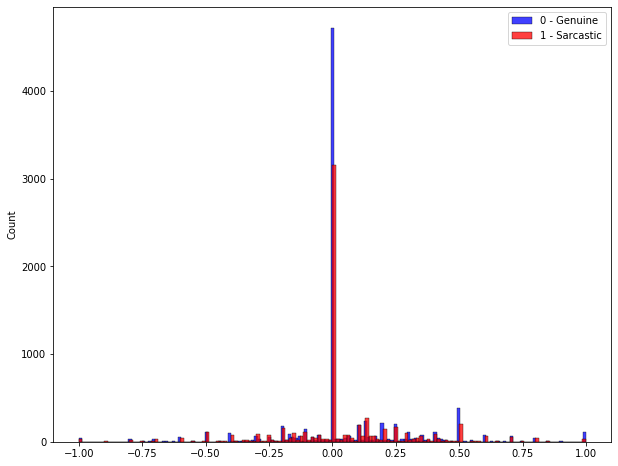

In [40]:
from textblob import TextBlob

def plot_sentiment(df):
    genuine = (df[df['is_sarcastic']==0]['headline'])
    genuineSentiments = [(TextBlob(item).polarity) for item in genuine]

    sarcastic = (df[df["is_sarcastic"]==1]["headline"])
    sarcasticSentiments = [(TextBlob(item).polarity) for item in sarcastic]
    
    # Plots the data
    plt.figure(figsize=(10,8))

    sns.histplot(genuineSentiments, label='0 - Genuine', color="blue")
    sns.histplot(sarcasticSentiments, label='1 - Sarcastic', color="red")
    
    # Add a legend to the plot
    plt.legend()

print("polarity of sarcastic headlines against genuine ones:")
plot_sentiment(df)

subjectivity of sarcasic headlines against genunine ones:


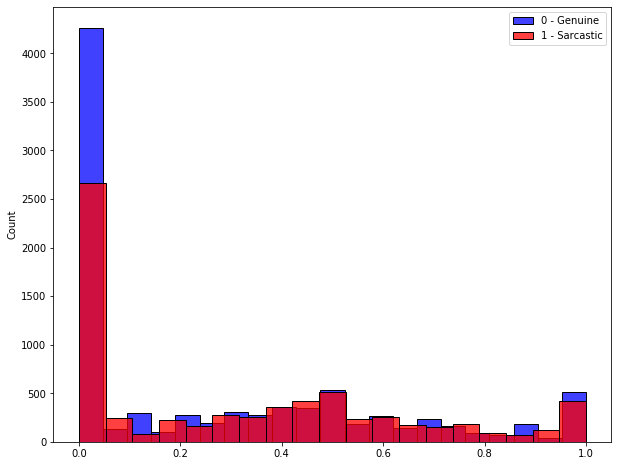

In [41]:
def plot_subjectivity(df):
    genuine = (df[df['is_sarcastic']==0]['headline'])
    genuineSentiments = [(TextBlob(item).subjectivity) for item in genuine]

    sarcastic = (df[df["is_sarcastic"]==1]["headline"])
    sarcasticSentiments = [(TextBlob(item).subjectivity) for item in sarcastic]
    
    # Plots the data
    plt.figure(figsize=(10,8))

    sns.histplot(genuineSentiments, label='0 - Genuine', color="blue")
    sns.histplot(sarcasticSentiments, label='1 - Sarcastic', color="red")
    
    # Add a legend to the plot
    plt.legend()

print("subjectivity of sarcasic headlines against genunine ones:")
plot_subjectivity(df)

# BoW
BoW stands for bag of words, and it is a model that we can use to represent a sentence or document with how many times a word appears in it. This means that the order of the words is not taken into account.

In [23]:
def BoW(sentences):
    vocab = []
    freq = []
    for sentence in sentences:
        for word in sentence:
            if not vocab.__contains__(word):
                vocab.append(word)
    for sentence in sentences:
        sentenceFreq = []
        for word in vocab:
            sentenceFreq.append(sentence.count(word))
        freq.append(sentenceFreq)

    return vocab, np.array(freq)

#sentences = [" ".join(preprocess(item, stop_words)) for item in df['headline']]
sentences = ['Wales England Scotland Wales Scotland', 'apple apple banana pear apple', 'England Scotland England England England', 'pig sheep cow cow pig', 'Scotland Scotland Wales Scotland Scotland', 'Scotland England Scotland Scotland England', 'Scotland Scotland Wales Wales England', 'Scotland England Scotland England Scotland', 'pear apple apple apple pear', 'Scotland Scotland England Scotland Scotland', 'sheep sheep pig pig pig', 'apple banana apple apple apple', 'sheep sheep pig sheep cow', 'pig pig sheep sheep pig', 'Scotland Scotland Scotland England England', 'Wales England Scotland Wales England', 'England Scotland Wales England Scotland', 'cow sheep sheep cow cow', 'apple banana banana pear pear', 'pear pear banana apple banana']
vocab, freq = BoW([preprocess(item,stop_words) for item in sentences])
print(vocab)
print(freq)

['wale', 'england', 'scotland', 'apple', 'banana', 'pear', 'pig', 'sheep', 'cow']
[[2 1 2 0 0 0 0 0 0]
 [0 0 0 3 1 1 0 0 0]
 [0 4 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 1 2]
 [1 0 4 0 0 0 0 0 0]
 [0 2 3 0 0 0 0 0 0]
 [2 1 2 0 0 0 0 0 0]
 [0 2 3 0 0 0 0 0 0]
 [0 0 0 3 0 2 0 0 0]
 [0 1 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 2 0]
 [0 0 0 4 1 0 0 0 0]
 [0 0 0 0 0 0 1 3 1]
 [0 0 0 0 0 0 3 2 0]
 [0 2 3 0 0 0 0 0 0]
 [2 2 1 0 0 0 0 0 0]
 [1 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 3]
 [0 0 0 1 2 2 0 0 0]
 [0 0 0 1 2 2 0 0 0]]


# Jaccard Distance
---
Jaccard distance is a measure of the 'distances' between sentences that have been represented using the BoW model.

The jaccard distance is calculated by dividing the intersection of the two vectors by the union of the two vectors

$J(A, B) = 1 - \frac{\lvert A \cap B \rvert}{\lvert A \cup B \rvert}$

<img src=./NLP/notebooks/images/set.png width="400">


In [167]:
def calculate_jaccard_dist(u, v):
    intersection = 0
    union = 0
    for i in range(len(u)):
        
        # The word is present in both vectors
        if u[i] > 0 and v[i] > 0:
            intersection += 1
            
        # The word is present in one of the vectors
        if u[i] > 0 or v[i] > 0:
            union += 1
            
    jaccard_dist = 1 - (intersection / union)
    return jaccard_dist

print(calculate_jaccard_dist(freq[0],freq[1]))

1.0


If two sentences contain the same vocabulary with the same frequencies, then the jaccard distance will be 0 (this is the smallest it can be), whereas if the two sentences have no vocabulary in common, then the jaccard distance will be 1 (this is the largest it can be).

For example, the jaccard distance between "hello, how are you?", and "goodbye, have a nice day.", would be 1.

In [168]:
sentence1 = "hello, how are you?"
sentence2 = "goodbye, have a nice day."

#preprocess the sentences
sentence1 = (preprocess(sentence1, stop_words))
sentence2 = (preprocess(sentence2, stop_words))

#create bag-of-words
vocab, freq = BoW([sentence1, sentence2])
print("The jaccard distance between",freq[0],"and",freq[1],"is",calculate_jaccard_dist(freq[0],freq[1]))

The jaccard distance between [1 0 0 0] and [0 1 1 1] is 1.0


Sentences that share half of their vocabulary will have a jaccard distance of 0.5. For example, "Hello, are you okay?" and "Hello, i am okay" will have a jaccard distance of 0.5

In [169]:
sentence1 = "Hello, are you okay?"
sentence2 = "Hello, i am okay"

#preprocess the sentences
sentence1 = (preprocess(sentence1, stop_words))
sentence2 = (preprocess(sentence2, stop_words))

#create bag-of-words
vocab, freq = BoW([sentence1, sentence2])

print("The jaccard distance between",freq[0],"and",freq[1],"is",calculate_jaccard_dist(freq[0],freq[1]))

The jaccard distance between [1 1] and [1 1] is 0.0


You will notice that although we expected a jaccard distance of 0.5, we got a jaccard distance of 0. This is because the text has been preprocessed, meaning that some of the words have been removed. We can look at the vocab from the bag-of-words to confirm this.

In [170]:
print(vocab,"\n", freq)

['hello', 'okay'] 
 [[1 1]
 [1 1]]


As you can see, after preprocessing, these sentences contain the same words. Below, you can see that after preprocessing, the two sentences share no vocabulary.

In [171]:
sentence1 = "hello there"
sentence2 = "hello there General"

#preprocess the sentences
sentence1 = (preprocess(sentence1, stop_words))
sentence2 = (preprocess(sentence2, stop_words))

#create bag-of-words
vocab, freq = BoW([sentence1, sentence2])

print(vocab,"\n", freq)
print("The jaccard distance between",freq[0],"and",freq[1],"is",calculate_jaccard_dist(freq[0],freq[1]))

['hello', 'general'] 
 [[1 0]
 [1 1]]
The jaccard distance between [1 0] and [1 1] is 0.5


## UMAP
UMAP is another tool that we can use to visualise the data. Given a set of vectors, it can embed them such that similar vectors lie close together.

In [231]:
def plot_sentences_and_labels(sentences,sarcastic ,labels=None, metric='jaccard'):
    _, bow = BoW(sentences)
    
    # Embed the vectors into 2d using UMAP with the given metric
    reducer = umap.UMAP(metric=metric)
    embedding = reducer.fit_transform(bow)
    
    # Create a DataFrame (it is required for px.scatter)
    df = pd.DataFrame()
    df['x'] = embedding[:, 0]
    df['y'] = embedding[:, 1]
    df['headline'] = sentences
    df['label'] = sarcastic
    
    # Create an interactive scatter plot, with colours given by the labels
    color = "label"
    fig = px.scatter(df, 
                     x='x',
                     y='y', 
                     color=color,
                     hover_data=["headline"])

    fig.show()

#plot_sentences_and_labels(sentences)
headlines = (df['headline'])
headlines = ((([" ".join(preprocess(item, stop_words)) for item in headlines])))

sarcastic = (df['is_sarcastic'])

plot_sentences_and_labels(headlines, sarcastic)


C:\Users\ollie\AppData\Local\Programs\Python\Python37\lib\site-packages\umap\umap_.py:1530: UserWarning:

gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable



# Cosine Similarity
---
## Vectors
When using words in NLP, we need a way to convert them into something that the computer can understand. The way we do this is by converting them into vectors that represent the word.

Rather than training our own model to convert words into vectors, we can download a pre-existing model from Word2Vec.

Word2Vec uses a neural network to learn the relationships between words from a large corpus of text.


In [11]:
import gensim.downloader as api
from gensim.models.keyedvectors import Word2VecKeyedVectors
# model = api.load('word2vec-google-news-300')
# os.makedirs('models')
# model.save("./models/word2vec.model")

In [12]:
model = Word2VecKeyedVectors.load("./NLP/notebooks/models/word2vec.model")
word_vectors = {w: model[w] for w in model.vocab}

## Cosine Similarity
Cosine similarity is a measure of the similarity between two non-zero vectors. The vectors have to be non-zero as zero vectors are just points. Also, if there was a zero vector, then you would be dividing by zero, as shown in the equation below:

$ cos(\theta) = \frac{u \cdot v}{\| u\| \| v\|} $

<img src=./NLP/notebooks/images/cosine.png width="400">

Below is an example of how one could code cosine similarity.

In [3]:
import numpy as np

def cosine_similarity(u, v):
    return((np.dot(v,u)/(np.linalg.norm(u)*np.linalg.norm(v))))

#########################################

The range of cosine similarity is from -1 to 1. This is due to the nature of the cosine graph, as shown below:

#########################################
CHECK THIS!!!

In [4]:
print(cosine_similarity([1,0,0,1],[1,1,0,1]))

0.8164965809277259


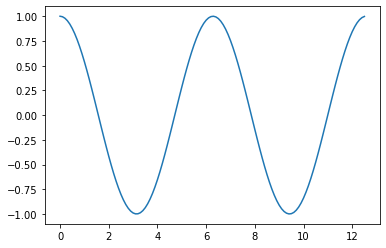

In [5]:
import matplotlib.pyplot as plt

x = np.arange(0,4*np.pi,0.1)   # start,stop,step
y = np.cos(x)

plt.plot(x,y)
plt.show()

We can plot the vectors to get an idea of what the cosine similiarity actually means in the real world.

1.0


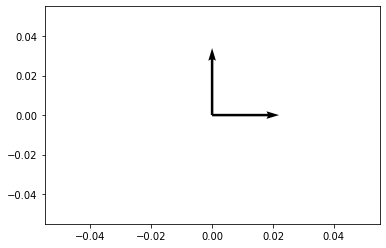

In [6]:
print(cosine_similarity([1,0],[1,0]))

plt.quiver(0,0, [0,1],[1,0],scale=5)
plt.show()

## Using Cosine Similarity
Once we have a value for the cosine similarity, we can use out Word2Vec model to calculate similar words.

In [9]:
def print_similar_words(root_vector, word_vectors, threshold=0.67):
    for word, vector in word_vectors.items():
        similarity = cosine_similarity(root_vector, vector)
        if similarity > threshold:
            print(f'{word}: {similarity:.2f}')
    
print_similar_words(word_vectors['england'], word_vectors)

england: 1.00
chelsea: 0.71
liverpool: 0.72
spain: 0.67
ronaldo: 0.68
torres: 0.68
rooney: 0.69
man_utd: 0.68
gerrard: 0.67
tottenham: 0.69
fulham: 0.70


The vectors of the words have some interesting properties.
We can take vectors with different meanings, add and subtract them, and then find similar words to our new vector.

For example, we could do Paris - France + Spain, and we should get a vector similar to that of Madrid.

In [10]:
p = (word_vectors['london'])
f = (word_vectors['england'])
s = (word_vectors['germany'])
newVec = p - f + s
print_similar_words(newVec, word_vectors, threshold=0.5)


paris: 0.74
spain: 0.68
dubai: 0.50
madrid: 0.52


# NN

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

fp = "./NLP/data/train_df.csv"
df = pd.read_csv(fp)

X = df['headline'].values
Y = df['is_sarcastic'].values

vocab, X = BoW([preprocess(item,stop_words) for item in X])

X_train, X_test, Y_train, T_test = train_test_split(X,Y, test_size=0.3, random_state=42)

vocab_size=10000
embedding_dim=16
max_length=32
trunc_type='post'
padding_type='post'
oov_tok='<oov>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print((X_train))





[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 0 ... 0 0 0]


TypeError: 'in <string>' requires string as left operand, not numpy.int32